# 0. Data, Preprocessing

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
soft = torch.nn.Softmax(dim=1)
sig = torch.nn.Sigmoid()
tanh = torch.nn.Tanh()

In [3]:
txt = list('AbAcAd'*50)
txt[:10]

['A', 'b', 'A', 'c', 'A', 'd', 'A', 'b', 'A', 'c']

In [4]:
df_train = pd.DataFrame({'x':txt[:-1], 'y':txt[1:]})
df_train[:5]

,x,y
0,A,b
1,b,A
2,A,c
3,c,A
4,A,d


`-` `input`은 단어의 종류 개수인 4이고 `hidden size`는 3으로 설정

# 1. RNNCell

In [29]:
x = torch.tensor(df_train.x.map({'A':0,'b':1,'c':2,'d':3}))
y = torch.tensor(df_train.y.map({'A':0,'b':1,'c':2,'d':3}))
X = torch.nn.functional.one_hot(x).float()
y = torch.nn.functional.one_hot(y).float()

In [30]:
rnncell = torch.nn.RNNCell(4,3)
linr = torch.nn.Linear(3,4)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(rnncell.parameters()) + list(linr.parameters()),lr=0.1)

In [31]:
L = len(X)
for l in range(200):
    loss = 0
    ht = torch.zeros(3)
    for t in range(L):
        Xt,yt = X[t],y[t]
        ht = rnncell(Xt,ht)
        netout = linr(ht)
        loss = loss + loss_fn(netout,yt)
    loss = loss/L
    loss.backward()
    optimizr.step()
    optimizr.zero_grad()

In [32]:
h = torch.zeros(L,3)
water = torch.zeros(3)
h[0] = rnncell(X[0],water)
for t in range(1,L):
    h[t] = rnncell(X[t],h[t-1])
yhat = soft(linr(h))
yhat

tensor([[1.0115e-02, 7.5804e-01, 5.5738e-02, 1.7611e-01],
        [9.9825e-01, 6.4732e-04, 1.0804e-03, 1.8182e-05],
        [1.4760e-03, 9.1038e-04, 9.9757e-01, 4.3916e-05],
        ...,
        [1.1941e-03, 1.3800e-03, 9.9737e-01, 5.9494e-05],
        [9.9993e-01, 4.1149e-07, 7.4368e-05, 6.4593e-08],
        [3.9266e-06, 4.9567e-01, 7.3947e-04, 5.0359e-01]],
       grad_fn=<SoftmaxBackward0>)

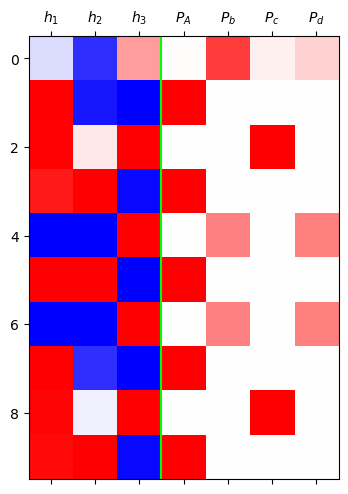

In [33]:
mat = torch.concat([h,yhat],axis=1).data[:10]
plt.matshow(mat,cmap='bwr',vmin=-1,vmax=1)
plt.axvline(x=2.5,color='lime')
plt.xticks(range(7),[r'$h_1$',r'$h_2$',r'$h_3$', r'$P_A$',r'$P_b$',r'$P_c$',r'$P_d$']);

# 2. RNN

In [25]:
x = torch.tensor(df_train.x.map({'A':0,'b':1,'c':2,'d':3}))
y = torch.tensor(df_train.y.map({'A':0,'b':1,'c':2,'d':3}))
X = torch.nn.functional.one_hot(x).float()
y = torch.nn.functional.one_hot(y).float()

In [26]:
rnn = torch.nn.RNN(4,3)
linr = torch.nn.Linear(3,4)
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)

water = torch.zeros(1,3)
for l in range(200):
    h,hL = rnn(X,water)
    netout = linr(h)
    loss = loss_fn(netout,y)
    loss.backward()
    optimizr.step()
    optimizr.zero_grad()

In [27]:
h,_ = rnn(X,water)
yhat = soft(linr(h))
yhat

tensor([[2.3293e-02, 9.7478e-01, 6.4693e-06, 1.9182e-03],
        [9.9996e-01, 3.9347e-05, 2.1711e-09, 2.8704e-08],
        [1.7528e-08, 5.4821e-07, 9.9156e-01, 8.4434e-03],
        ...,
        [1.7383e-08, 5.4203e-07, 9.9162e-01, 8.3797e-03],
        [9.9946e-01, 5.4431e-04, 1.2763e-08, 2.2101e-07],
        [7.5180e-06, 1.0098e-02, 5.9897e-03, 9.8390e-01]],
       grad_fn=<SoftmaxBackward0>)

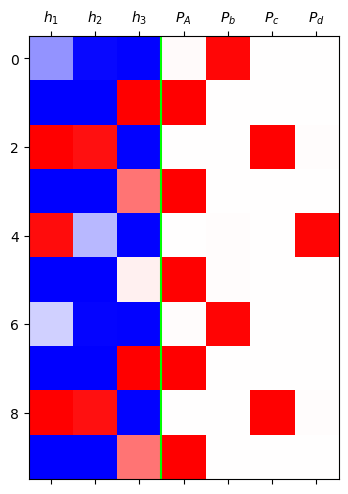

In [28]:
mat = torch.concat([h,yhat],axis=1).data[:10]
plt.matshow(mat,cmap='bwr',vmin=-1,vmax=1)
plt.axvline(x=2.5,color='lime')
plt.xticks(range(7),[r'$h_1$',r'$h_2$',r'$h_3$', r'$P_A$',r'$P_b$',r'$P_c$',r'$P_d$']);

# 3. LSTM

In [37]:
x = torch.tensor(df_train.x.map({'A':0,'b':1,'c':2,'d':3}))
y = torch.tensor(df_train.y.map({'A':0,'b':1,'c':2,'d':3}))
X = torch.nn.functional.one_hot(x).float()
y = torch.nn.functional.one_hot(y).float()

In [38]:
lstm = torch.nn.LSTM(4,3)
linr = torch.nn.Linear(3,4)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm.parameters()) + list(linr.parameters()),lr=0.1)

for l in range(500):
    h,_ = lstm(X)
    netout = linr(h)
    loss = loss_fn(netout,y)
    loss.backward()
    optimizr.step()
    optimizr.zero_grad()

In [39]:
h,_ = lstm(X)
yhat = soft(linr(h))
yhat

tensor([[7.0750e-04, 9.7673e-01, 1.4719e-08, 2.2562e-02],
        [9.9934e-01, 1.9747e-09, 6.5815e-04, 7.6823e-07],
        [7.2932e-06, 7.5534e-11, 9.9835e-01, 1.6416e-03],
        ...,
        [7.4841e-06, 7.9410e-11, 9.9831e-01, 1.6844e-03],
        [9.9994e-01, 6.7138e-08, 5.9597e-05, 2.4941e-06],
        [3.2600e-04, 1.7392e-03, 1.3645e-03, 9.9657e-01]],
       grad_fn=<SoftmaxBackward0>)

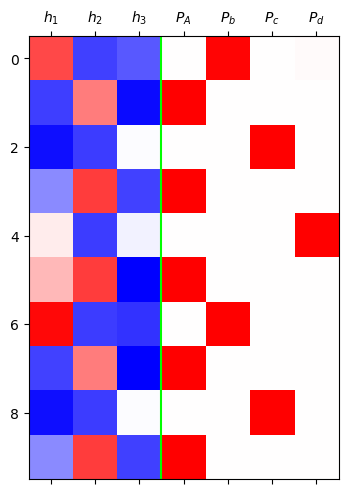

In [40]:
mat = torch.concat([h,yhat],axis=1).data[:10]
plt.matshow(mat,cmap='bwr',vmin=-1,vmax=1)
plt.axvline(x=2.5,color='lime')
plt.xticks(range(7),[r'$h_1$',r'$h_2$',r'$h_3$', r'$P_A$',r'$P_b$',r'$P_c$',r'$P_d$']);

# 4. LSTMCell

In [152]:
x = torch.tensor(df_train.x.map({'A':0,'b':1,'c':2,'d':3}))
y = torch.tensor(df_train.y.map({'A':0,'b':1,'c':2,'d':3}))
X = torch.nn.functional.one_hot(x).float()
y = torch.nn.functional.one_hot(y).float()

In [148]:
lstmcell = torch.nn.LSTMCell(4,3)
linr = torch.nn.Linear(3,4)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstmcell.parameters())+list(linr.parameters()),lr=0.1)

In [149]:
for l in range(100):
    loss = 0
    ht = torch.zeros(3)
    ct = torch.zeros(3)
    for t in range(len(X)):
        Xt,yt = X[t],y[t]
        ht,ct = lstmcell(Xt,(ht,ct))
        netout_t = linr(ht)
        loss = loss + loss_fn(netout_t,yt)
    loss = loss/L
    loss.backward()
    optimizr.step()
    optimizr.zero_grad()

In [150]:
h = torch.zeros(L,3)
c = torch.zeros(L,3)
ht = torch.zeros(3)
ct = torch.zeros(3)
h[0],c[0] = lstmcell(X[0],(ht,ct))
for t in range(1,L):
    h[t],c[t] = lstmcell(X[t],(h[t-1],c[t-1]))
yhat = soft(linr(h))
yhat

tensor([[2.0200e-03, 9.7144e-01, 1.5596e-02, 1.0939e-02],
        [9.8657e-01, 3.4276e-08, 1.3420e-02, 5.1240e-06],
        [1.6634e-02, 1.8627e-03, 9.6436e-01, 1.7148e-02],
        ...,
        [1.8804e-02, 4.0043e-03, 9.6906e-01, 8.1301e-03],
        [9.9448e-01, 1.0317e-05, 3.7891e-03, 1.7218e-03],
        [1.2681e-04, 7.6272e-04, 4.3521e-03, 9.9476e-01]],
       grad_fn=<SoftmaxBackward0>)

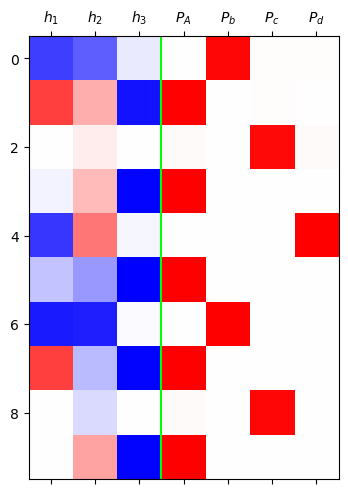

In [151]:
mat = torch.concat([h,yhat],axis=1).data[:10]
plt.matshow(mat,cmap='bwr',vmin=-1,vmax=1)
plt.axvline(x=2.5,color='lime')
plt.xticks(range(7),[r'$h_1$',r'$h_2$',r'$h_3$','$P_A$',r'$P_b$',r'$P_c$',r'$P_d$']);

# 5. `torch.nn.Module` + rNNCell

In [48]:
x = torch.tensor(df_train.x.map({'A':0,'b':1,'c':2,'d':3}))
y = torch.tensor(df_train.y.map({'A':0,'b':1,'c':2,'d':3}))
X = torch.nn.functional.one_hot(x).float()
y = torch.nn.functional.one_hot(y).float()

In [49]:
class rNNCell(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.i2h = torch.nn.Linear(4,2) 
        self.h2h = torch.nn.Linear(2,2) 
        self.tanh = torch.nn.Tanh()
    def forward(self,Xt,ht):
        ht = self.tanh(self.i2h(Xt)+self.h2h(ht))
        return ht
torch.manual_seed(43052) # 시드고정해야만 답나옴 --> 임베딩공간이 부족하다는 의미 (사실상 6개의 문자니까!)
rnncell = rNNCell() 
cook = torch.nn.Linear(2,4) 
#
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(rnncell.parameters())+ list(cook.parameters()),lr=0.1)
#---#
L = len(X)
for epoc in range(200):
    ## 1~2 
    ht = torch.zeros(2)
    loss = 0
    for t in range(L):
        Xt, yt = X[t], y[t]
        ht = rnncell(Xt, ht)
        ot = cook(ht) 
        loss = loss + loss_fn(ot, yt)
    loss = loss/L
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [50]:
h = torch.zeros(L,2)
water = torch.zeros(2)
h[0] = rnncell(X[0],water)
for t in range(1,L):
    h[t] = rnncell(X[t],h[t-1])
yhat = soft(cook(h))
yhat    

tensor([[4.1978e-03, 9.4555e-01, 1.9557e-06, 5.0253e-02],
        [9.9994e-01, 5.5569e-05, 8.4751e-10, 1.3143e-06],
        [2.1349e-07, 1.1345e-06, 9.7019e-01, 2.9806e-02],
        ...,
        [2.1339e-07, 1.1339e-06, 9.7020e-01, 2.9798e-02],
        [9.9901e-01, 9.6573e-04, 6.9303e-09, 2.1945e-05],
        [7.2919e-04, 2.5484e-02, 3.3011e-02, 9.4078e-01]],
       grad_fn=<SoftmaxBackward0>)

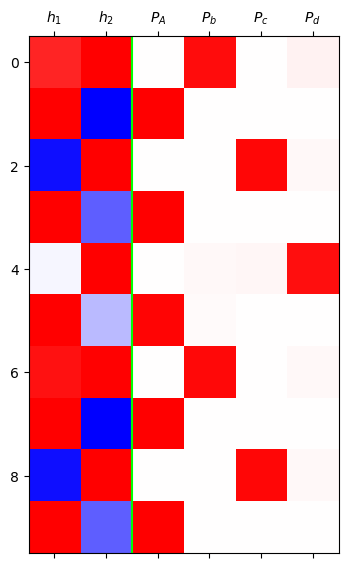

In [51]:
mat = torch.concat([h,yhat],axis=1).data[:10]
plt.matshow(mat,cmap='bwr',vmin=-1,vmax=1)
plt.axvline(x=1.5,color='lime')
plt.xticks(range(6),[r'$h_1$',r'$h_2$',r'$P_A$',r'$P_b$',r'$P_c$',r'$P_d$']);

In [152]:
x = torch.tensor(df_train.x.map({'A':0,'b':1,'c':2,'d':3}))
y = torch.tensor(df_train.y.map({'A':0,'b':1,'c':2,'d':3}))
X = torch.nn.functional.one_hot(x).float()
y = torch.nn.functional.one_hot(y).float()

In [148]:
lstmcell = torch.nn.LSTMCell(4,3)
linr = torch.nn.Linear(3,4)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstmcell.parameters())+list(linr.parameters()),lr=0.1)

In [149]:
for l in range(100):
    loss = 0
    ht = torch.zeros(3)
    ct = torch.zeros(3)
    for t in range(len(X)):
        Xt,yt = X[t],y[t]
        ht,ct = lstmcell(Xt,(ht,ct))
        netout_t = linr(ht)
        loss = loss + loss_fn(netout_t,yt)
    loss = loss/L
    loss.backward()
    optimizr.step()
    optimizr.zero_grad()

In [150]:
h = torch.zeros(L,3)
c = torch.zeros(L,3)
ht = torch.zeros(3)
ct = torch.zeros(3)
h[0],c[0] = lstmcell(X[0],(ht,ct))
for t in range(1,L):
    h[t],c[t] = lstmcell(X[t],(h[t-1],c[t-1]))
yhat = soft(linr(h))
yhat

tensor([[2.0200e-03, 9.7144e-01, 1.5596e-02, 1.0939e-02],
        [9.8657e-01, 3.4276e-08, 1.3420e-02, 5.1240e-06],
        [1.6634e-02, 1.8627e-03, 9.6436e-01, 1.7148e-02],
        ...,
        [1.8804e-02, 4.0043e-03, 9.6906e-01, 8.1301e-03],
        [9.9448e-01, 1.0317e-05, 3.7891e-03, 1.7218e-03],
        [1.2681e-04, 7.6272e-04, 4.3521e-03, 9.9476e-01]],
       grad_fn=<SoftmaxBackward0>)

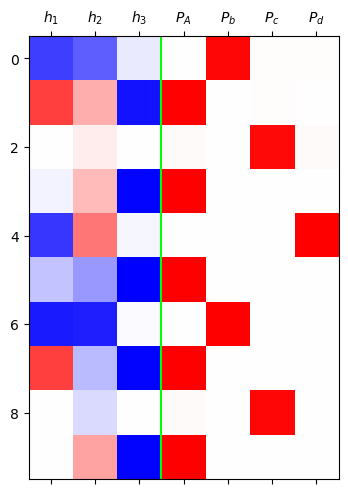

In [151]:
mat = torch.concat([h,yhat],axis=1).data[:10]
plt.matshow(mat,cmap='bwr',vmin=-1,vmax=1)
plt.axvline(x=2.5,color='lime')
plt.xticks(range(7),[r'$h_1$',r'$h_2$',r'$h_3$','$P_A$',r'$P_b$',r'$P_c$',r'$P_d$']);

# 6. `torch.nn.Module` + LSTM

In [67]:
torch.manual_seed(43052)
lstmcell = torch.nn.LSTMCell(4,2) # 숙성담당
cook = torch.nn.Linear(2,4)
lstm = torch.nn.LSTM(4,2) # <-- 이거로 학습
lstm.weight_ih_l0.data = lstmcell.weight_ih.data
lstm.weight_hh_l0.data = lstmcell.weight_hh.data
lstm.bias_ih_l0.data = lstmcell.bias_ih.data
lstm.bias_hh_l0.data = lstmcell.bias_hh.data
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm.parameters())+list(cook.parameters()),lr=0.1) 
#---#
L = len(X)
Water = torch.zeros(1,2)
for epoc in range(1):
    # 1 
    h,(hL,cL) = lstm(X,(Water,Water))
    netout = cook(h)
    # 2 
    loss = loss_fn(netout,y)
    # 3
    loss.backward()
    # 4 
    optimizr.step()
    optimizr.zero_grad()

In [68]:
hL,cL

(tensor([[0.1745, 0.1610]], grad_fn=<SqueezeBackward1>),
 tensor([[0.2894, 0.4533]], grad_fn=<SqueezeBackward1>))